In [13]:
# Load necessary libraries
suppressWarnings(library(readr))
suppressWarnings(library(dplyr))
suppressWarnings(library(ggplot2))

# Read CSV files
flight_data <- suppressMessages(read_csv("data/flights.csv"))
airlines_codes <- suppressMessages(read_csv("data/airlines_carrier_codes.csv"))

# Merge flight data with airline codes
flights <- flight_data %>%
  left_join(airlines_codes, by = c("carrier" = "Carrier Code"))

# Display the first few rows
head(flights)

id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,Airline Name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,2023,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,United Airlines Inc.
1,2023,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,United Airlines Inc.
2,2023,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,American Airlines Inc.
3,2023,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,JetBlue Airways
4,2023,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,Delta Air Lines Inc.
5,2023,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,United Airlines Inc.


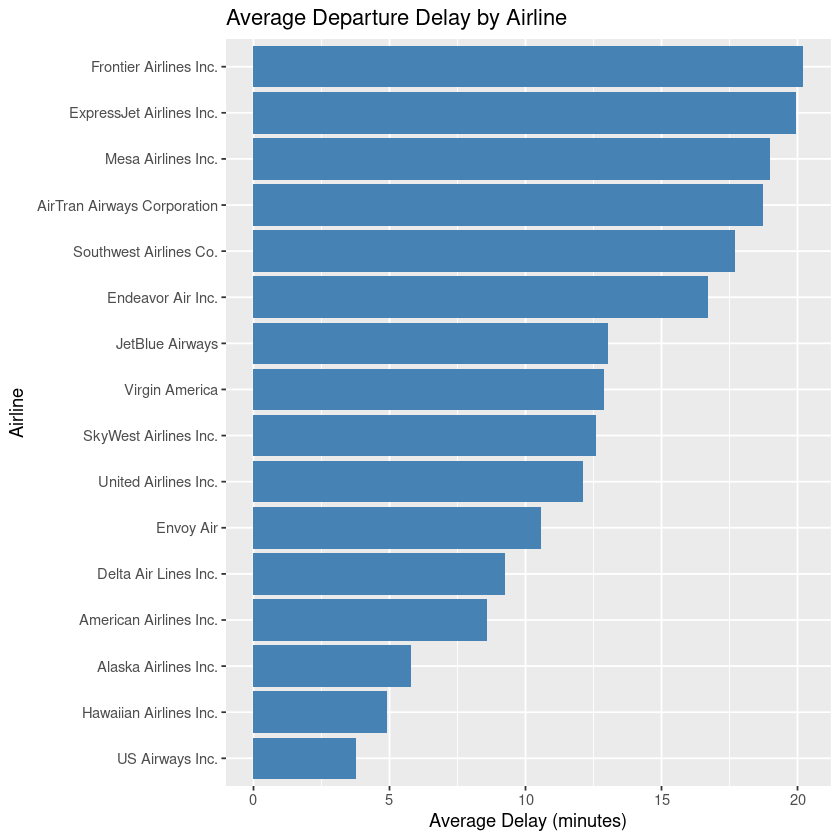

In [14]:
# Calculate average delays by airline
airline_performance <- flights %>%
  group_by(`Airline Name`) %>%
  summarise(
    avg_dep_delay = mean(dep_delay, na.rm = TRUE),
    avg_arr_delay = mean(arr_delay, na.rm = TRUE)
  )

# Plot average departure delays
ggplot(airline_performance, aes(x = reorder(`Airline Name`, avg_dep_delay), y = avg_dep_delay)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Average Departure Delay by Airline", x = "Airline", y = "Average Delay (minutes)")

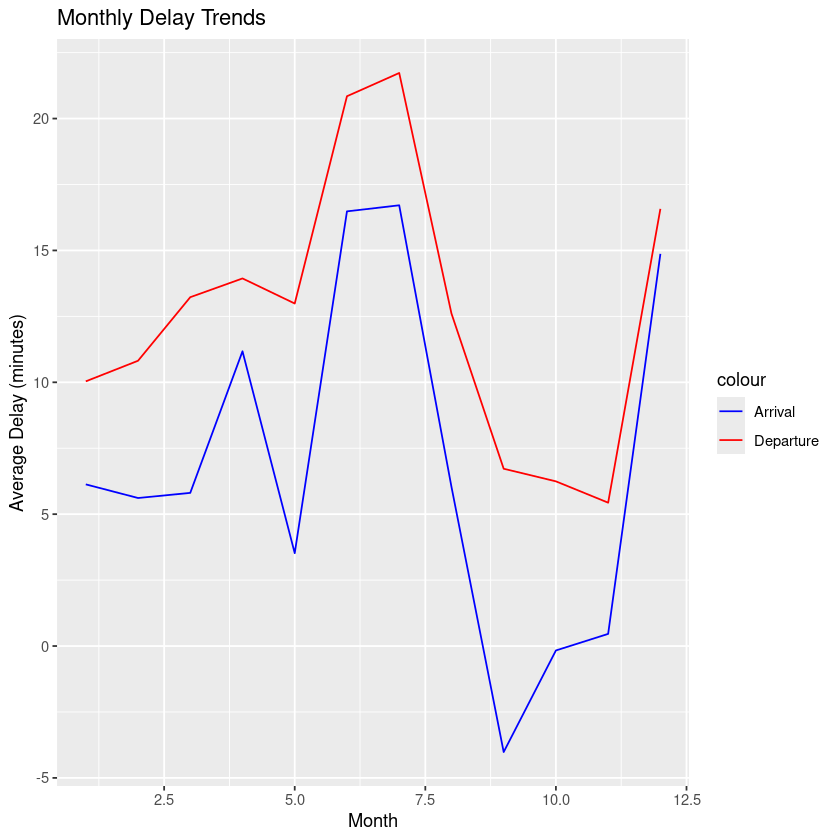

In [15]:
# Average delays by month
monthly_delays <- flights %>%
  group_by(month) %>%
  summarise(
    avg_dep_delay = mean(dep_delay, na.rm = TRUE),
    avg_arr_delay = mean(arr_delay, na.rm = TRUE)
  )

# Plot monthly delays
ggplot(monthly_delays, aes(x = month)) +
  geom_line(aes(y = avg_dep_delay, color = "Departure")) +
  geom_line(aes(y = avg_arr_delay, color = "Arrival")) +
  labs(title = "Monthly Delay Trends", x = "Month", y = "Average Delay (minutes)") +
  scale_color_manual(values = c("Departure" = "red", "Arrival" = "blue"))


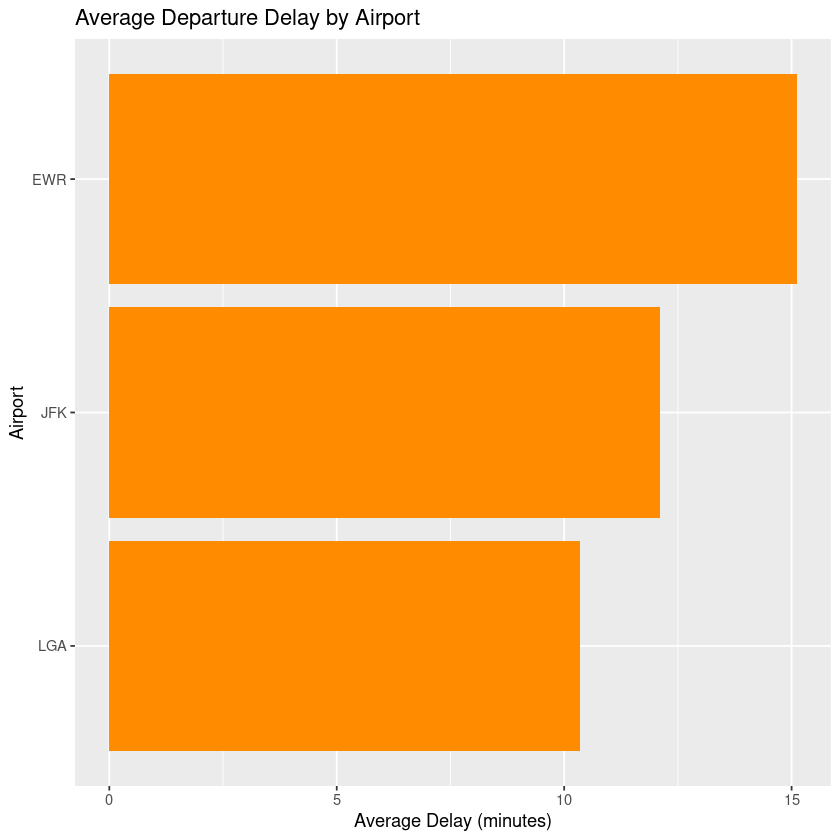

In [16]:
# Average delays by origin airport
airport_delays <- flights %>%
  group_by(origin) %>%
  summarise(
    avg_dep_delay = mean(dep_delay, na.rm = TRUE),
    avg_arr_delay = mean(arr_delay, na.rm = TRUE)
  )

# Plot average departure delays by airport
ggplot(airport_delays, aes(x = reorder(origin, avg_dep_delay), y = avg_dep_delay)) +
  geom_bar(stat = "identity", fill = "darkorange") +
  coord_flip() +
  labs(title = "Average Departure Delay by Airport", x = "Airport", y = "Average Delay (minutes)")

Warning message:
“Removed 9430 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


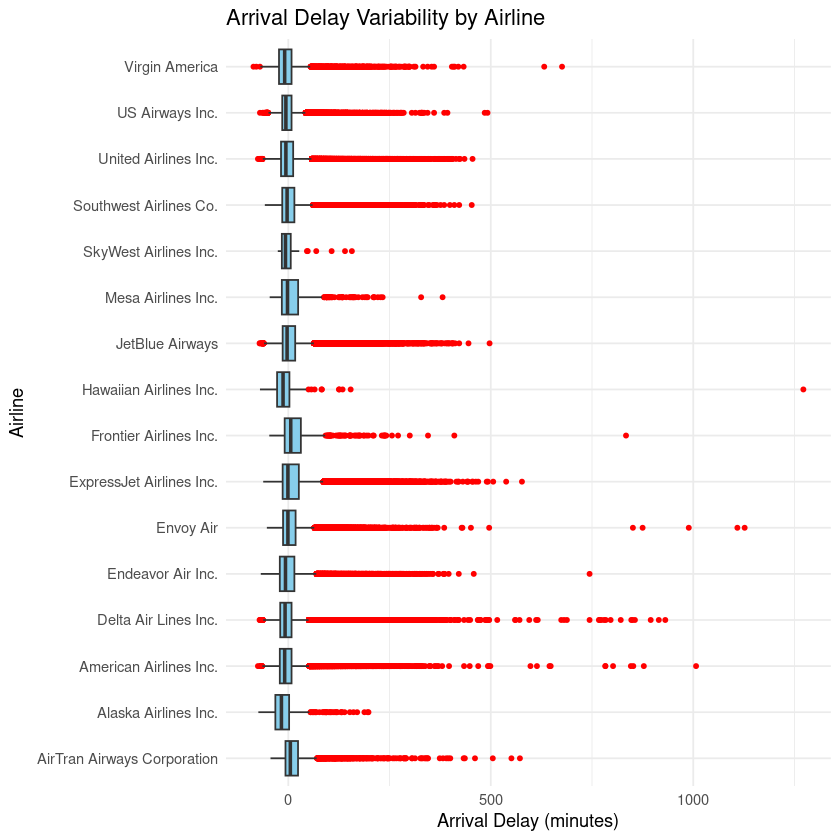

In [17]:
# Boxplot of arrival delay variability by airline
ggplot(flights, aes(x = `Airline Name`, y = arr_delay)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.size = 1) +
  coord_flip() +
  labs(title = "Arrival Delay Variability by Airline",
       x = "Airline",
       y = "Arrival Delay (minutes)") +
  theme_minimal()

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


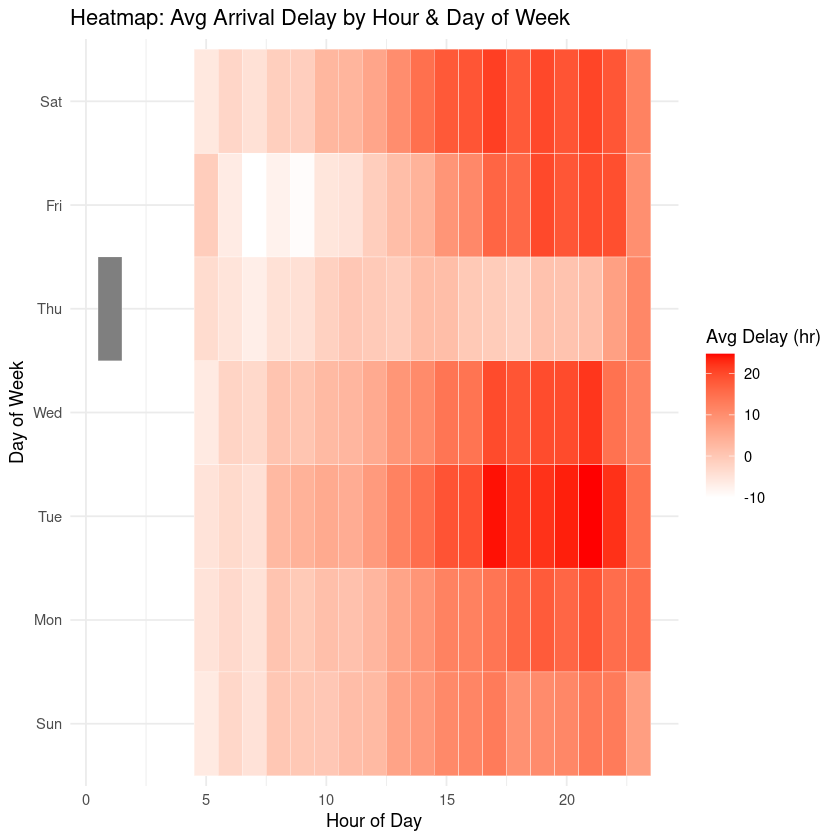

In [18]:
library(lubridate)
library(dplyr)

# Convert sched_dep_time (HHMM) to proper datetime
flights <- flights %>%
  mutate(
    sched_dep_time_padded = sprintf("%04d", sched_dep_time),  # Ensure HHMM format
    dep_hour = as.integer(substr(sched_dep_time_padded, 1, 2)),
    dep_minute = as.integer(substr(sched_dep_time_padded, 3, 4)),
    sched_dep_datetime = make_datetime(year, month, day, dep_hour, dep_minute),
    day_of_week = wday(sched_dep_datetime, label = TRUE)
  )

# Average delay by hour and day of week
heatmap_data <- flights %>%
  group_by(day_of_week, dep_hour) %>%
  summarise(avg_arr_delay = mean(arr_delay, na.rm = TRUE)) %>%
  ungroup()

# Heatmap
ggplot(heatmap_data, aes(x = dep_hour, y = day_of_week, fill = avg_arr_delay)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "red", name = "Avg Delay (hr)") +
  labs(title = "Heatmap: Avg Arrival Delay by Hour & Day of Week",
       x = "Hour of Day",
       y = "Day of Week") + 
  theme_minimal()


✈️ Flight Delay Visual Analysis and Predictions Across Airlines

Overview
Flight delays are a major pain point for passengers and airlines alike. This report explores U.S. domestic flight data to uncover delay patterns, identify airline and airport performance trends, and provide insights to support operational improvements.

Data Sources

flights.csv: Includes flight details such as scheduled/actual departure and arrival times, delays, carrier info, origin and destination airports, and more.

airlines_carrier_codes.csv: Maps carrier codes to airline names.




1. Airline Performance: Who's On Time?

We evaluated airline performance by analyzing average departure and arrival delays across all carriers.

Key Insights:

Airlines like Hawaiian Airlines (HA) and Alaska Airlines (AS) consistently show the lowest average delays.

Carriers like American Airlines (AA) and United (UA) experienced greater variance and higher mean delays.

On-time performance is relatively stable month-to-month for top-performing airlines but fluctuates for others during summer and winter seasons.

Visuals:

Bar chart comparing average departure and arrival delays by carrier

Line chart of monthly average delay by carrier




2. When Do Delays Happen Most?

We analyzed delays by month, weekday, and hour of the day.

Key Insights:

Summer months (June–August) and December show the highest average delays, likely due to peak travel demand and weather.

Mondays and Fridays experience higher delays — potentially due to business travel and heavier traffic.

Flights scheduled between 3 PM and 8 PM show the greatest average departure delays, possibly due to cascading effects from earlier delays.

Visuals:

Heatmap of average delay by hour and weekday

Monthly delay trend line




3. Airport Performance: Where Are Delays Worst?

We examined origin airports to compare average delays.

Key Insights:

Smaller airports like Honolulu (HNL) tend to have fewer delays.

Major hubs like Chicago O'Hare (ORD), New York JFK (JFK), and Atlanta (ATL) show higher average delays, likely due to traffic volume and congestion.

Weather and regional airspace complexity may also contribute to these differences.

Visuals:

Boxplot of delay distribution by airport

Map visualization of average delays by origin airport (if supported)




What Factors Influence Delays the Most?

To explore which features most influence departure delays of 15 minutes or more, we used a Random Forest classification model. The model considered key variables:

Month of flight

Hour of scheduled departure

Flight distance

Carrier (airline)

Key Insights:

Departure hour was the most important predictor: flights scheduled later in the day (especially between 3–8 PM) were significantly more prone to delays.

Carrier played a substantial role: some airlines have better operational efficiency or buffer scheduling.

Flight distance had a moderate effect, with longer flights slightly more likely to be delayed — potentially due to stricter routing or airspace dependencies.

Month contributed less compared to time of day and carrier, but peak months like July and December did correlate with higher delay likelihood.

These findings suggest that airline policies, scheduling strategies, and traffic congestion during certain hours are strong contributors to delays. Airlines could potentially mitigate delays by adjusting peak hour schedules or adding recovery buffers.

Visuals (optional but recommended):

Variable importance plot from the Random Forest model

Partial dependence plots for top predictors




Conclusion

Delays are influenced by multiple factors, including carrier operational practices, seasonal demand, airport congestion, and time of day. Understanding these patterns helps airlines and airports take targeted steps to reduce delays and improve passenger experience.

## 💾 The data

#### Your team provided you with 2 files with the following information ([source](https://www.kaggle.com/datasets/mahoora00135/flights/data)):

**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number 
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code 
- `Airline Name` - Airline Name 
